<a href="https://colab.research.google.com/github/Arevalinchy/Image_Processing_Initiative/blob/main/IIPP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IIP Proyect

Objective: To use disparity maps from stereoscopic images to improve the segmentation of these image \

Step 1: The first step consists in computing the disparity map itself

Disparity map: Is an image where its pixel has a value corresponding to the displacements of pixels from one image to the other on stereo images

Algorithm idea: \\
for each pixel of the image corresponding to the left eye (left image) \\
find the corresponding pixel in the right image \\
  
put the corresponding distance (displacement value) in the corresponding pixel of the map


The main problem is: how to put in correspondance pixels of two different images ?




In [3]:
!pip install opencv-python

In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

Making the stereoscopic image

In [3]:
img = cv.imread('/img/stereoimage.jpg', cv.IMREAD_GRAYSCALE)
#taking the two stereocopic images
imgL = img[100:500,0:550] #Due to being matrices is simle to grab ROIs by giving the coordinates (ROI == Regions Of Interes)
imgR = img[100:500,550:1200]

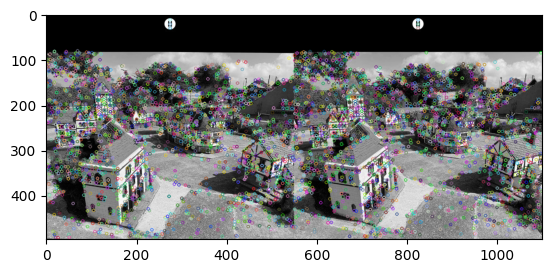

In [4]:
img = cv.imread('./img/stereoimage.jpg')
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create()
kp = sift.detect(gray,None)
img=cv.drawKeypoints(gray,kp,img)
cv.imwrite('sift_keypoints.jpg',img)
plt.imshow(img)
plt.show()

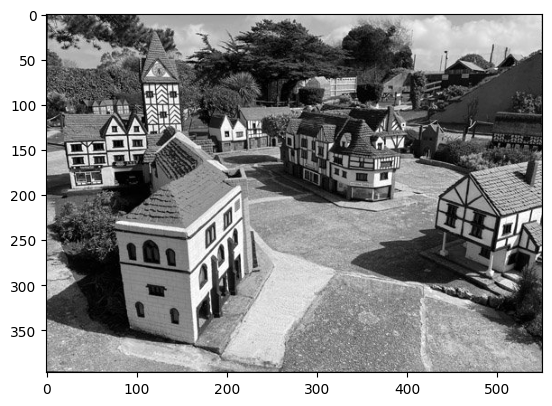

In [4]:
#Plotting the left one
plt.imshow(imgL,'gray')
plt.show()

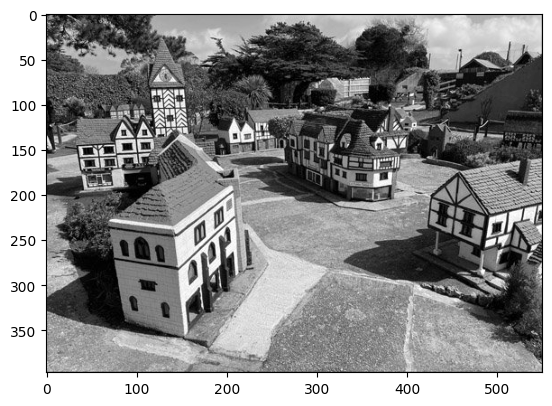

In [5]:
#Plotting the right one
plt.imshow(imgR,'gray')
plt.show()

**Creating the disparity map**

The code bellow reveals disparity map for the two selected images. For the time being it looks in rough shape and not ideal at all

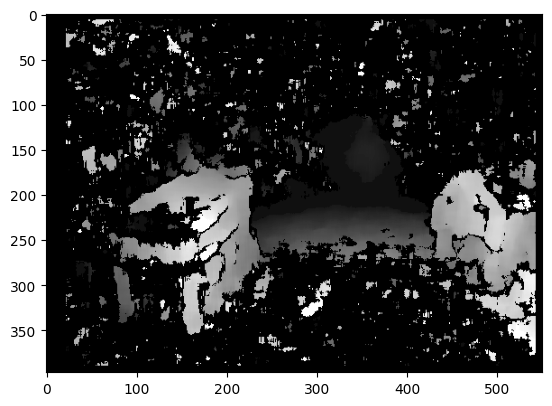

In [6]:
stereo = cv.StereoBM.create(numDisparities=16, blockSize=15)
disparity = stereo.compute(imgL,imgR)
plt.imshow(disparity,'gray')
plt.show()

Now we proceed to play with the matching block to make the image better

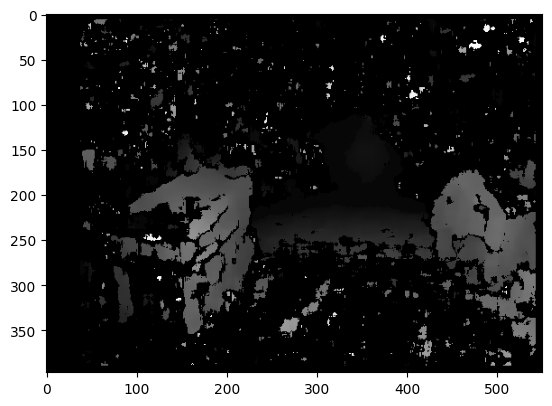

In [7]:
stereo = cv.StereoBM.create(numDisparities=32, blockSize=15)
disparity = stereo.compute(imgL,imgR)
plt.imshow(disparity,'gray')
plt.show()

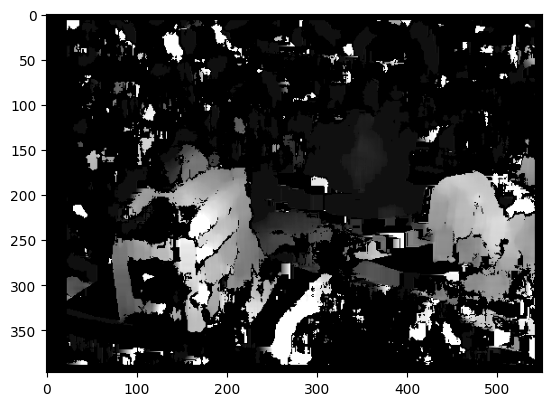

In [118]:
#cv.StereoBM.setPreFilterType()
stereo = cv.StereoBM.create(numDisparities=16, blockSize=17)
stereo.setPreFilterType(cv.STEREO_BM_PREFILTER_NORMALIZED_RESPONSE)
# pre_filter_type is an integer value representing the type of pre-filtering
# It can take one of the following values:
# cv.STEREO_BM_PREFILTER_NORMALIZED_RESPONSE: Normalize the response of the pre-filter
# cv.STEREO_BM_PREFILTER_XSOBEL: Use Sobel operator for pre-filtering in the horizontal direction
# cv.STEREO_BM_BASIC_PRESET: Use the basic pre-filtering preset
stereo.setPreFilterSize(77)
# pre_filter_size is an odd integer value representing the size of the pre-filtering window
# It determines the size of the window used for pre-filtering before stereo matching
# Larger pre-filter sizes can smooth the disparity map, while smaller sizes can preserve more details
# Experiment with different pre-filter sizes to see their effect on your stereo matching results

#stereo.setPreFilterType(0)

# pre_filter_type is an integer value representing the type of pre-filtering
# It can take one of the following values:
# cv2.STEREO_BM_PREFILTER_NORMALIZED_RESPONSE: Normalize the response of the pre-filter
# cv2.STEREO_BM_PREFILTER_XSOBEL: Use Sobel operator for pre-filtering in the horizontal direction
# cv2.STEREO_BM_BASIC_PRESET: Use the basic pre-filtering preset

# Experiment with different pre-filter types to see their effect on your stereo matching results

disparity = stereo.compute(imgL,imgR)
plt.imshow(disparity,'gray')
plt.show()



Shift code


# Part 2

Segmentation algorithms can be classified into three categories :
- pixel based algorithms, for example histogram-based ones.
- edge based algorithm (most of the time, it corresponds to high pass filters)
- region based algorithm (watershed, split and merge, etc.)

In [ ]:
Kme

In [ ]:
import sklearn.cluster as skl
skl

#Every link that helps me survive the long and awaited development of the C.V. project >;)

https://learnopencv.com/depth-perception-using-stereo-camera-python-c/
https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html?highlight=filterspeckles#cv2.filterSpeckles
https://python.plainenglish.io/the-depth-ii-block-matching-d599e9372712
https://docs.opencv.org/3.4/d9/dba/classcv_1_1StereoBM.html
https://docs.opencv.org/3.4/dd/d53/tutorial_py_depthmap.html
https://docs.opencv.org/4.x/db/deb/tutorial_display_image.html